In [1]:
!rm -rf train test validation PetImages sample_data

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
import requests
from io import BytesIO
from IPython.display import clear_output

In [5]:

zip_ref = zipfile.ZipFile('/content/microsoft-catsvsdogs-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# Define the root directory containing Cat and Dog folders
data_directory = '/content/PetImages'

# Define the directories for train, validation, and test
train_directory = '/content/train'
validation_directory = '/content/validation'
test_directory = '/content/test'

# Create train, validation, and test directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(validation_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Define the categories (Cat and Dog)
categories = ['Cat', 'Dog']

# Loop through each category and split data
for category in categories:
    # Get the list of filenames for each category
    category_directory = os.path.join(data_directory, category)
    file_list = os.listdir(category_directory)
    train_files, test_val_files = train_test_split(file_list, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    # Define destination directories for each split
    train_category_directory = os.path.join(train_directory, category)
    val_category_directory = os.path.join(validation_directory, category)
    test_category_directory = os.path.join(test_directory, category)

    # Create category directories within train, validation, and test directories
    os.makedirs(train_category_directory, exist_ok=True)
    os.makedirs(val_category_directory, exist_ok=True)
    os.makedirs(test_category_directory, exist_ok=True)

    # Move files to respective directories for train, validation, and test
    for filename in train_files:
        src = os.path.join(category_directory, filename)
        dst = os.path.join(train_category_directory, filename)
        shutil.copyfile(src, dst)

    for filename in val_files:
        src = os.path.join(category_directory, filename)
        dst = os.path.join(val_category_directory, filename)
        shutil.copyfile(src, dst)

    for filename in test_files:
        src = os.path.join(category_directory, filename)
        dst = os.path.join(test_category_directory, filename)
        shutil.copyfile(src, dst)


In [7]:
# Define the directories
train_directory_cat = '/content/train/Cat'
train_directory_dog = '/content/train/Dog'
validation_directory_cat = '/content/validation/Cat'
validation_directory_dog = '/content/validation/Dog'
test_directory_cat = '/content/test/Cat'
test_directory_dog = '/content/test/Dog'

# Function to count files in a directory
def count_files(directory):
    return len(os.listdir(directory))

# Get counts for each directory
train_count_cat = count_files(train_directory_cat)
train_count_dog = count_files(train_directory_dog)
validation_count_cat = count_files(validation_directory_cat)
validation_count_dog = count_files(validation_directory_dog)
test_count_cat = count_files(test_directory_cat)
test_count_dog = count_files(test_directory_dog)
total=train_count_cat + train_count_dog + validation_count_cat + validation_count_dog + test_count_cat + test_count_dog
# Print counts
print(f"Train - Cat: {train_count_cat} files")
print(f"Train - Dog: {train_count_dog} files")
print(f"Validation - Cat: {validation_count_cat} files")
print(f"Validation - Dog: {validation_count_dog} files")
print(f"Test - Cat: {test_count_cat} files")
print(f"Test - Dog: {test_count_dog} files")


Train - Cat: 8750 files
Train - Dog: 8750 files
Validation - Cat: 1875 files
Validation - Dog: 1875 files
Test - Cat: 1876 files
Test - Dog: 1876 files


In [8]:
data_train_path = '/content/train'
data_test_path = '/content/test'
data_val_path = '/content/validation'

dirs_to_check = [
    os.path.join(data_train_path, 'Cat'),
    os.path.join(data_train_path, 'Dog'),
    os.path.join(data_val_path, 'Cat'),
    os.path.join(data_val_path, 'Dog'),
    os.path.join(data_test_path, 'Dog'),
    os.path.join(data_test_path, 'Cat')
]

def convert_to_grayscale(image_path):
    try:
        with Image.open(image_path) as img:
            if img.mode != 'L':  # If not already in grayscale
                img = img.convert('L')  # Convert to grayscale
                img.save(image_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def convert_images_to_grayscale(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            convert_to_grayscale(file_path)

def convert_all_images_to_grayscale():
    for directory in dirs_to_check:
        if os.path.exists(directory):
            convert_images_to_grayscale(directory)

# Convert all images to grayscale
convert_all_images_to_grayscale()


Error processing /content/train/Cat/666.jpg: cannot identify image file '/content/train/Cat/666.jpg'
Error processing /content/train/Cat/Thumbs.db: cannot identify image file '/content/train/Cat/Thumbs.db'
Error processing /content/train/Dog/11702.jpg: cannot identify image file '/content/train/Dog/11702.jpg'


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error processing /content/train/Dog/Thumbs.db: cannot identify image file '/content/train/Dog/Thumbs.db'


In [9]:
import os
from PIL import Image



allowed_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

def check_image_channels(image_path):
    try:
        with Image.open(image_path) as img:
            return img.mode in ['RGB', 'RGBA', 'L']
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return False

def remove_images_with_wrong_channels(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not check_image_channels(file_path):
                try:
                    os.remove(file_path)
                    print(f"Removed {file_path} - Unexpected number of channels")
                except Exception as e:
                    print(f"Error removing {file_path}: {e}")

def remove_images_with_wrong_channels_from_directories():
    for directory in dirs_to_check:
        if os.path.exists(directory):
            remove_images_with_wrong_channels(directory)

# Remove images with unexpected channel count
remove_images_with_wrong_channels_from_directories()


Error processing /content/train/Cat/666.jpg: cannot identify image file '/content/train/Cat/666.jpg'
Removed /content/train/Cat/666.jpg - Unexpected number of channels
Error processing /content/train/Cat/Thumbs.db: cannot identify image file '/content/train/Cat/Thumbs.db'
Removed /content/train/Cat/Thumbs.db - Unexpected number of channels
Error processing /content/train/Dog/11702.jpg: cannot identify image file '/content/train/Dog/11702.jpg'
Removed /content/train/Dog/11702.jpg - Unexpected number of channels
Error processing /content/train/Dog/Thumbs.db: cannot identify image file '/content/train/Dog/Thumbs.db'
Removed /content/train/Dog/Thumbs.db - Unexpected number of channels


In [10]:
img_width = 180
img_height =180

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 17496 files belonging to 2 classes.


In [12]:
data_cat = data_train.class_names

In [13]:
data_cat

['Cat', 'Dog']

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 3750 files belonging to 2 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3752 files belonging to 2 classes.


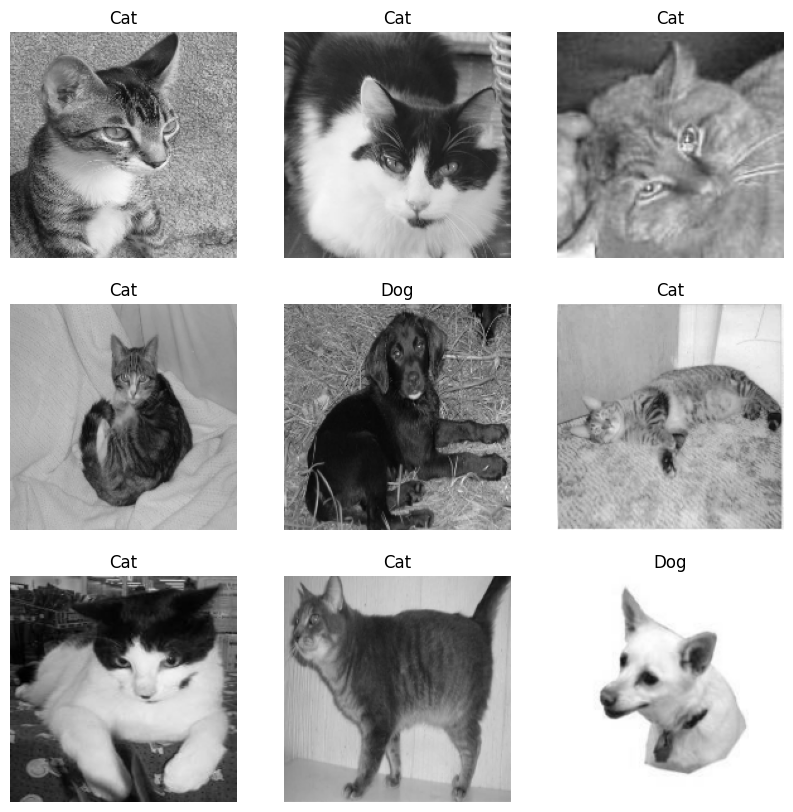

In [16]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [17]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [20]:
epochs_size = 30

try:
    history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)
except tf.errors.InvalidArgumentError as e:
    print("\nError during training:", e)


Epoch 1/30
547/547 [==============================] - 34s 51ms/step - loss: 0.6540 - accuracy: 0.6420 - val_loss: 0.5290 - val_accuracy: 0.7395
Epoch 2/30
547/547 [==============================] - 27s 49ms/step - loss: 0.5092 - accuracy: 0.7541 - val_loss: 0.6089 - val_accuracy: 0.6843
Epoch 3/30
547/547 [==============================] - 27s 49ms/step - loss: 0.4517 - accuracy: 0.7865 - val_loss: 0.4884 - val_accuracy: 0.7571
Epoch 4/30
547/547 [==============================] - 26s 46ms/step - loss: 0.3958 - accuracy: 0.8205 - val_loss: 0.4800 - val_accuracy: 0.7832
Epoch 5/30
547/547 [==============================] - 26s 48ms/step - loss: 0.3362 - accuracy: 0.8517 - val_loss: 0.5228 - val_accuracy: 0.7763
Epoch 6/30
547/547 [==============================] - 25s 46ms/step - loss: 0.2832 - accuracy: 0.8752 - val_loss: 0.5710 - val_accuracy: 0.7797
Epoch 7/30
547/547 [==============================] - 30s 55ms/step - loss: 0.2482 - accuracy: 0.8978 - val_loss: 0.6820 - val_accuracy:

Text(0.5, 1.0, 'Loss')

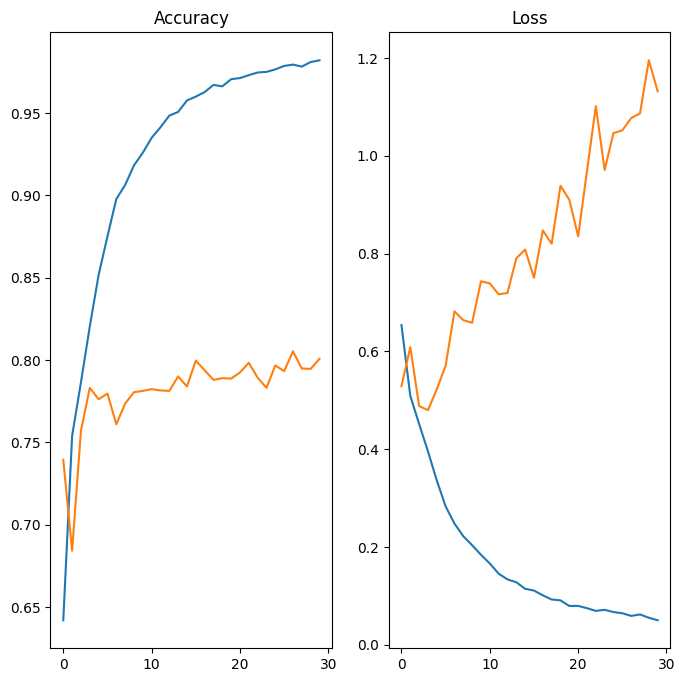

In [21]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [2]:
def batchImg(_url:str):
    url = _url

    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

    # Convert image to grayscale
    image_gray = image.convert('L')

    # Define target size
    img_height, img_width = 180, 180

    # Resize the image
    resized_image = image_gray.resize((img_height, img_width))

    # Convert the resized image to an array
    img_array = np.array(resized_image)

    # Convert grayscale image to 3-channel (RGB)
    img_rgb = np.stack((img_array,) * 3, axis=-1)

    # Add extra dimension for batch
    img_batch = tf.expand_dims(img_rgb, axis=0)
    return img_batch

In [3]:
def predict(img):
  predict = model.predict(batchImg(img))
  score = tf.nn.softmax(predict)
  print('the Animal in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


In [6]:
predict('https://cdn.britannica.com/25/172925-050-DC7E2298/black-cat-back.jpg')

NameError: ignored

In [7]:
model.save('Image_classify.keras')

AttributeError: ignored

In [8]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/Image_classify.keras')


OSError: ignored

In [29]:
import os
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import image

# Define the directories for train, validation, and test

# Function to read images and extract features
def extract_features(directory):
    features = []
    labels = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for file in os.listdir(category_dir):
            file_path = os.path.join(category_dir, file)
            if file_path.endswith(('.jpg', '.jpeg', '.png')):
                img = Image.open(file_path)
                img = img.resize((100, 100))  # Resize image to a fixed size
                img_array = np.array(img)  # Convert image to array
                features.append(img_array.flatten())  # Flatten the image array
                labels.append(category)  # Assign label
    return np.array(features), np.array(labels)

# Extract features and labels from train, validation, and test directories
X_train, y_train = extract_features(data_train_path)
X_test, y_test = extract_features(data_test_path)
X_val, y_val = extract_features(data_val_path)



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Initialize different models with hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Define hyperparameters grid for hyperparameter tuning
params = {
    "Logistic Regression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ['l1', 'l2']
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 15]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15]
    },
    "Support Vector Machine": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    }
}

# Train, tune hyperparameters, and evaluate models
for name, model in models.items():
    param_grid = params[name]
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    pipeline = Pipeline([('model', grid)])  # Create a pipeline with the grid search

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Evaluate model on the test set
    accuracy = pipeline.score(X_test, y_test)
    best_params = pipeline.named_steps['model'].best_params_
    print(f"Accuracy of {name} on test set: {accuracy}")
    print(f"Best hyperparameters for {name}: {best_params}")


NameError: ignored

In [ ]:
import numpy as np
from PIL import Image

# Function to extract features from a single grayscale image
def extract_single_image_features(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((100, 100))  # Resize image to match the training data size
    img_array = np.array(img).flatten()  # Convert image to array and flatten
    return img_array.reshape(1, -1)  # Return reshaped array

# Define the path of the image you want to predict
image_to_predict = '/content/Cat_November_2010-1a.jpg'  # Replace with your image path

# Extract features from the image
new_image_features = extract_single_image_features(image_to_predict)

# Use the trained logistic regression model for prediction
prediction = logistic_regression.predict(new_image_features)

# Print the predicted label
print(f"The predicted label for the image is: {prediction[0]}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy of {name} on test set: {accuracy}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Initialize different models with hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Define hyperparameters grid for hyperparameter tuning
params = {
    "Logistic Regression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ['l1', 'l2']
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 15]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15]
    },
    "Support Vector Machine": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    }
}

# Train, tune hyperparameters, and evaluate models
for name, model in models.items():
    param_grid = params[name]
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    pipeline = Pipeline([('model', grid)])  # Create a pipeline with the grid search

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Evaluate model on the test set
    accuracy = pipeline.score(X_test, y_test)
    best_params = pipeline.named_steps['model'].best_params_
    print(f"Accuracy of {name} on test set: {accuracy}")
    print(f"Best hyperparameters for {name}: {best_params}")
